# Projeto 1 - Ciência dos Dados

Nome: Isadora Stigliani Dalberto

**GitHub:** https://github.com/Doradalberto/APS_Isadora_Dalberto

**Base de Dados:** https://www.gapminder.org/data/documentation/gd004/ &
                   https://data.worldbank.org/indicator/NY.GDP.MKTP.KD

## Pergunta(s):

Os países que entraram no SADC (Comunidade para o Desenvolvimento da África Austral) em 1992 tiveram um aumento no seu PIB superior aos países da África que não entraram? Além do PIB, a expectativa de vida também aumentou proporcionalmente ao PIB?

**Anos de interesse:**

>de 1971 até 1991 - 20 anos antes de existir o SADC
 
>de 1992 até 2010 - 20 anos após o SADC existir

## Hipótese:

Os países que entraram na SADC tiveram seu PIB elevado pois, por ser uma organização que visa o crescimento econômico dos países participantes, há uma maior exportação e melhoria na economia do país como um todo.** -- OLHAR DENOVO ESSA HIPOTESE!

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\dorad\OneDrive\Documentos\Insper\2 Semestre\2.CienDados\Projeto1\APS_Isadora_Dalberto


Lê os arquivos que vamos utilizar no projeto:

In [3]:
dados = pd.read_excel('total_gdp_us_inflation_adjusted.xlsx')

In [4]:
vida = pd.read_excel('life_expectancy_years.xlsx')

Altera o índice das tabelas:

In [5]:
dados_indice = dados.set_index("country")
vida_indice = vida.set_index("country")

Países pertencentes ao Bloco SADC (áfrica austral):

In [6]:
af_aus = ["Angola", "South Africa", "Botswana", "Congo, Dem. Rep.", "Lesotho", "Madagascar", "Malawi", "Mauritius", "Mozambique", "Namibia", "Swaziland", "Tanzania", "Zambia", "Zimbabwe"]

Paises da áfrica que não pertencem ao Bloco SADC:

In [7]:
af_nao_aus = ["Benin", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", "Central African Republic", "Chad", "Congo, Rep.", "Djibouti", "Eritrea", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Niger", "Nigeria", "Rwanda", "Senegal", "Seychelles", "Sierra Leone", "Sudan", "Togo", "Uganda" ]

Lista total de Anos

In [8]:
anos = [1971, 1972,1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

Lista da primeira metade

In [9]:
anos_1 = [1971, 1972,1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991]

Lista da segunda metade

In [10]:
anos_2 = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

In [11]:
dados_indice.loc[:, "AF_AUS"] = 0      #criar uma coluna chamada AF_AUS e falar que todos os países são 0
dados_indice.loc[af_aus,"AF_AUS"]=1    #falar que todos os países da lista af_aus recebem o valor de 1 na coluna AF_AUS

dados_indice.loc[:, "AF_NAO_AUS"] = 0     #criar uma coluna chamada AF_NAO_AUS e falar que todos os países são 0
dados_indice.loc[af_nao_aus,"AF_NAO_AUS"]=1   #falar que todos os países da lista af_nao_aus recebem o valor de 1 na coluna AF_NAO_AUS

vida_indice.loc[:, "AF_AUS"] = 0
vida_indice.loc[af_aus,"AF_AUS"]=1

vida_indice.loc[:, "AF_NAO_AUS"] = 0
vida_indice.loc[af_nao_aus,"AF_NAO_AUS"]=1

In [97]:
dados_af_aus = dados_indice.loc[af_aus]
     #imprime todos os paises que sao do SADC

dados_af_nao_aus = dados_indice.loc[af_nao_aus]
     #imprime todos os paises que sao da africa mas nao sao da SADC

vida_af_aus = vida_indice.loc[af_aus]

vida_af_nao_aus = vida_indice.loc[af_nao_aus]


In [102]:
africa = af_aus + af_nao_aus
dados_africa = dados_indice.loc[africa]
vida_africa = vida_indice.loc[africa]

In [111]:
transpor_aus = dados_af_aus.transpose()
transpor_quant_aus = transpor_aus[:-2]

aus_anos1 = transpor_quant_aus.loc[(transpor_quant_aus.index>1970) & (transpor_quant_aus.index<1992),:].transpose()
soma_aus_anos1 = aus_anos1.sum() #soma POR ANO

aus_anos2 = transpor_quant_aus.loc[(transpor_quant_aus.index>1991) & (transpor_quant_aus.index<2013),:].transpose()
soma_aus_anos2 = aus_anos2.sum() #soma POR ANO

aus_anos_total = transpor_quant_aus.loc[(transpor_quant_aus.index>1970) & (transpor_quant_aus.index<2013),:].transpose()
soma_aus_anos_total = aus_anos_total.sum() ##

soma_aus_total = soma_aus_anos1 + soma_aus_anos2


In [112]:
transpor_nao_aus = dados_af_nao_aus.transpose()
transpor_quant_nao_aus = transpor_nao_aus[:-2]

nao_aus_anos1 = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1970) & (transpor_quant_nao_aus.index<1992),:].transpose()
soma_nao_aus_anos1 = nao_aus_anos1.sum()

nao_aus_anos2 = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1991) & (transpor_quant_nao_aus.index<2013),:].transpose()
soma_nao_aus_anos2 = nao_aus_anos2.sum()

nao_aus_anos_total = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1970) & (transpor_quant_nao_aus.index<2013),:].transpose()
soma_nao_aus_anos_total = nao_aus_anos_total.sum() ##

soma_nao_aus_total = soma_nao_aus_anos1 + soma_nao_aus_anos2

In [114]:
transpor = dados_africa.transpose()
transpor_quant = transpor[:-2]

africa_anos1 = transpor_quant.loc[(transpor_quant.index>1970) & (transpor_quant.index<1992),:].transpose()
soma_africa_anos1 = africa_anos1.sum()

africa_anos2 = transpor_quant.loc[(transpor_quant.index>1991) & (transpor_quant.index<2013),:].transpose()
soma_africa_anos2 = africa_anos2.sum()

africa_anos_total = transpor_quant.loc[(transpor_quant.index>1970) & (transpor_quant.index<2013),:].transpose()
soma_africa_anos_total = africa_anos_total.sum()

soma_africa_total = soma_africa_anos1 + soma_africa_anos2

In [23]:
africa_anos_total.loc[:, "AF_AUS"] = 0
africa_anos_total.loc[af_aus,"AF_AUS"]=1

africa_anos_total.loc[:, "AF_NAO_AUS"] = 0
africa_anos_total.loc[af_nao_aus,"AF_NAO_AUS"]=1

africa_anos_total  #Imprime todos os paises da África no período de tempo selecionado e indica quais
#                   sao da SADC e quais não são

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,AF_AUS,AF_NAO_AUS
country,,,,,,,,,,,,,,,,,,,,,
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.080000e+10,...,4.670000e+10,5.560000e+10,6.840000e+10,7.790000e+10,7.980000e+10,8.250000e+10,8.570000e+10,9.020000e+10,1,0
South Africa,1.440000e+11,1.460000e+11,1.530000e+11,1.620000e+11,1.650000e+11,1.680000e+11,1.680000e+11,1.730000e+11,1.800000e+11,1.920000e+11,...,3.220000e+11,3.400000e+11,3.580000e+11,3.700000e+11,3.640000e+11,3.750000e+11,3.880000e+11,3.960000e+11,1,0
Botswana,5.880000e+08,7.430000e+08,9.020000e+08,9.810000e+08,1.060000e+09,1.180000e+09,1.320000e+09,1.510000e+09,1.690000e+09,1.890000e+09,...,1.020000e+10,1.110000e+10,1.200000e+10,1.280000e+10,1.180000e+10,1.280000e+10,1.360000e+10,1.420000e+10,1,0
"Congo, Dem. Rep.",2.260000e+10,2.270000e+10,2.450000e+10,2.530000e+10,2.400000e+10,2.270000e+10,2.290000e+10,2.170000e+10,2.180000e+10,2.230000e+10,...,1.650000e+10,1.730000e+10,1.840000e+10,1.960000e+10,2.010000e+10,2.160000e+10,2.300000e+10,2.470000e+10,1,0
Lesotho,3.780000e+08,3.770000e+08,4.770000e+08,5.290000e+08,4.570000e+08,5.080000e+08,6.190000e+08,7.320000e+08,7.530000e+08,7.330000e+08,...,1.890000e+09,1.970000e+09,2.060000e+09,2.200000e+09,2.250000e+09,2.390000e+09,2.550000e+09,2.700000e+09,1,0
Madagascar,5.100000e+09,5.040000e+09,4.910000e+09,5.000000e+09,5.070000e+09,4.910000e+09,5.030000e+09,4.890000e+09,5.380000e+09,5.420000e+09,...,7.590000e+09,7.970000e+09,8.470000e+09,9.070000e+09,8.710000e+09,8.730000e+09,8.860000e+09,9.130000e+09,1,0
Malawi,1.600000e+09,1.700000e+09,1.740000e+09,1.870000e+09,1.980000e+09,2.080000e+09,2.180000e+09,2.390000e+09,2.500000e+09,2.510000e+09,...,4.870000e+09,5.100000e+09,5.580000e+09,6.010000e+09,6.510000e+09,6.960000e+09,7.300000e+09,7.440000e+09,1,0
Mauritius,NaN,NaN,NaN,NaN,NaN,2.120000e+09,2.260000e+09,2.350000e+09,2.430000e+09,2.190000e+09,...,7.670000e+09,8.330000e+09,8.800000e+09,9.280000e+09,9.580000e+09,1.000000e+10,1.040000e+10,1.080000e+10,1,0
Mozambique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.260000e+09,...,7.100000e+09,7.790000e+09,8.370000e+09,8.950000e+09,9.520000e+09,1.020000e+10,1.090000e+10,1.170000e+10,1,0


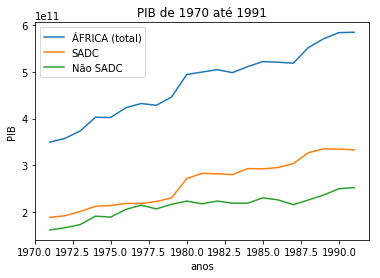

In [24]:
plt.plot(anos_1, soma_africa_anos1, label="ÁFRICA (total)")
plt.plot(anos_1, soma_aus_anos1, label="SADC")
plt.plot(anos_1, soma_nao_aus_anos1, label="Não SADC")
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB de 1970 até 1991")
plt.legend()
plt.show()

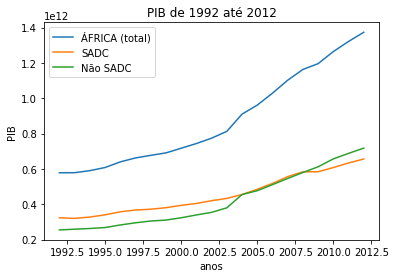

In [25]:
#SOMA AFRICA TOTAL (ANOS 2 + ANOS1) TA DANDO NAN

plt.plot(anos_2, soma_africa_anos2, label="ÁFRICA (total)")
plt.plot(anos_2, soma_aus_anos2, label="SADC")
plt.plot(anos_2, soma_nao_aus_anos2, label="Não SADC")  # soma_aus e soma_nao_aus tao dando os mesmos valores!
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB de 1992 até 2012")
plt.legend()
plt.show()

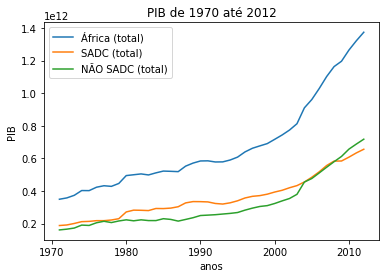

In [26]:
#plt.plot(anos_2, soma_africa_anos2, label="ÁFRICA após (total)") -- com a divisao 
#plt.plot(anos_1, soma_africa_anos1, label="ÁFRICA antes (total)") -- com a divisao
#plt.plot(anos_2, soma_aus_anos2, label="SADC após") -- com a divisao
#plt.plot(anos_1, soma_aus_anos1, label="SADC antes") -- com a divisao
#plt.plot(anos_2, soma_nao_aus_anos2, label="Não SADC após") -- com a divisao
#plt.plot(anos_1, soma_nao_aus_anos1, label="Não SADC antes") -- com a divisao
plt.plot(anos, soma_africa_anos_total, label="África (total)")
plt.plot(anos, soma_aus_anos_total, label="SADC (total)" )
plt.plot(anos, soma_nao_aus_anos_total, label="NÃO SADC (total)")
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB de 1970 até 2012")
plt.legend()
plt.show()

# ISSO É COMO O GRÁFICO DO TOTAL (CÉLULA DE BAIXO) DEVE PARECER >> fiz o total com o intervalo de tempo maior
# Divisão: entre os dois intervalos de tempo definidos (com uma "falha" no gráfico)-- a falha é intencional!

In [64]:
dados_af_nao_aus_retirada = dados_af_nao_aus.dropna()
dados_af_aus_retirada = dados_af_aus.dropna()
vida_af_nao_aus_retirada = vida_af_nao_aus.dropna()
vida_af_aus_retirada = vida_af_nao_aus.dropna()

In [70]:
af_aus_1972 = dados_af_aus_retirada[1990]
af_nao_aus_1972 = dados_af_nao_aus_retirada[1990]
af_aus_2010 = dados_af_aus_retirada[2010]
af_nao_aus_2010 = dados_af_nao_aus_retirada[2010]
vida_af_aus_2010 = vida_af_aus_retirada[2010]
vida_af_nao_aus_2010 = vida_af_nao_aus_retirada[2010]
vida_af_aus_1972 = vida_af_aus_retirada[1990]
vida_af_nao_aus_1972 = vida_af_nao_aus_retirada[1990]

af_aus_1972.rename("PIB 1990", inplace=True)
af_nao_aus_1972.rename("PIB 1990", inplace=True)
af_aus_2010.rename("PIB 2010", inplace=True)
af_nao_aus_2010.rename("PIB 2010", inplace=True)
vida_af_aus_2010.rename("ExpVida 2010", inplace=True)
vida_af_nao_aus_2010.rename("ExpVida 2010 não AUS", inplace=True)
vida_af_aus_1972.rename("ExpVida 1990", inplace=True)
vida_af_nao_aus_1972.rename("ExpVida 1990 não AUS", inplace=True)


country
Benin                       55.5
Burkina Faso                50.6
Burundi                     48.0
Cameroon                    58.5
Cape Verde                  67.8
Central African Republic    48.2
Chad                        53.3
Congo, Rep.                 54.1
Djibouti                    61.3
Eritrea                     52.4
Ethiopia                    46.6
Gabon                       59.5
Gambia                      61.6
Ghana                       58.8
Guinea                      52.0
Guinea-Bissau               49.2
Liberia                     49.9
Mali                        49.4
Niger                       47.1
Nigeria                     54.9
Rwanda                      49.1
Senegal                     57.5
Seychelles                  69.3
Sierra Leone                50.6
Sudan                       58.6
Togo                        57.4
Uganda                      49.2
Name: ExpVida 1990 não AUS, dtype: float64

In [69]:
comp_2010_af_nao_aus = pd.concat([af_nao_aus_2010, vida_af_nao_aus_2010], axis=1)
comp_2010_af_nao_aus

C:\Users\dorad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,PIB 2010,ExpVida 2010 não AUS
Benin,6.970000e+09,61.8
Burkina Faso,8.980000e+09,57.9
Burundi,2.030000e+09,57.7
Cameroon,2.610000e+10,57.3
Cape Verde,NaN,72.5
Central African Republic,1.990000e+09,47.5
Chad,1.070000e+10,56.5
"Congo, Rep.",1.200000e+10,60.4
Djibouti,NaN,63.7
Eritrea,NaN,61.7


In [78]:
vida_af_nao_aus_1972

country
Benin                       55.5
Burkina Faso                50.6
Burundi                     48.0
Cameroon                    58.5
Cape Verde                  67.8
Central African Republic    48.2
Chad                        53.3
Congo, Rep.                 54.1
Djibouti                    61.3
Eritrea                     52.4
Ethiopia                    46.6
Gabon                       59.5
Gambia                      61.6
Ghana                       58.8
Guinea                      52.0
Guinea-Bissau               49.2
Liberia                     49.9
Mali                        49.4
Niger                       47.1
Nigeria                     54.9
Rwanda                      49.1
Senegal                     57.5
Seychelles                  69.3
Sierra Leone                50.6
Sudan                       58.6
Togo                        57.4
Uganda                      49.2
Name: ExpVida 1990 não AUS, dtype: float64

[]

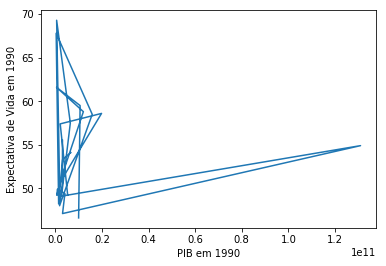

In [81]:

af_nao_aus_1972_2 = dados_af_nao_aus[1990]
vida_af_nao_aus_1972_2 = vida_af_nao_aus[1990]

plt.plot(af_nao_aus_1972_2, vida_af_nao_aus_1972_2)
plt.xlabel("PIB em 1990")
plt.ylabel("Expectativa de Vida em 1990")
plt.plot()


In [95]:
af_nao_aus_1972_2 = dados_af_nao_aus[1990]
vida_af_nao_aus_1972_2 = vida_af_nao_aus[1990]
af_aus_1972_2 = dados_af_aus[1972]
vida_af_aus_1972_2 = vida_af_aus[1972]
af_aus_2010_2 = dados_af_aus[2010]
vida_af_aus_2010_2 = vida_af_aus[2010]
af_nao_aus_2010_2 = af_nao_aus[2010]
vida_af_nao_aus_2010_2 = af_nao_aus[2010]

plt.scatter(af_nao_aus_1972_2, vida_af_nao_aus_1972_2, color="b")
plt.scatter(af_aus_1972_2, vida_af_aus_1972_2, color="r")
plt.scatter(af_aus_2010_2, vida_af_aus_2010_2)
plt.scatter(af_nao_aus_2010_2, vida_af_nao_aus_2010_2)


IndexError: list index out of range

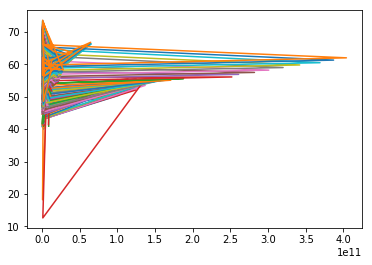

In [90]:
for m in anos:
    plt.plot(dados_af_nao_aus[m], vida_af_nao_aus[m])

In [85]:
af_nao_aus

['Benin',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Congo, Rep.',
 'Djibouti',
 'Eritrea',
 'Ethiopia',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Liberia',
 'Mali',
 'Niger',
 'Nigeria',
 'Rwanda',
 'Senegal',
 'Seychelles',
 'Sierra Leone',
 'Sudan',
 'Togo',
 'Uganda']

In [71]:
comp_1972_af_aus = pd.concat([af_aus_1972, vida_af_aus_1972], axis=1)
comp_1972_af_aus

C:\Users\dorad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,PIB 1990,ExpVida 1990
Benin,NaN,55.5
Botswana,5.320000e+09,NaN
Burkina Faso,NaN,50.6
Burundi,NaN,48.0
Cameroon,NaN,58.5
Cape Verde,NaN,67.8
Central African Republic,NaN,48.2
Chad,NaN,53.3
"Congo, Dem. Rep.",2.430000e+10,NaN
"Congo, Rep.",NaN,54.1


In [55]:
comp_1972_af_nao_aus = pd.concat([af_nao_aus_1972, vida_af_nao_aus_1972], axis=1)
comp_1972_af_nao_aus

,PIB 1990,ExpVida 1990 não AUS
country,,
Benin,3.030000e+09,55.5
Burkina Faso,3.010000e+09,50.6
Burundi,1.780000e+09,48.0
Cameroon,1.580000e+10,58.5
Cape Verde,3.220000e+08,67.8
Central African Republic,1.380000e+09,48.2
Chad,3.080000e+09,53.3
"Congo, Rep.",6.620000e+09,54.1
Djibouti,NaN,61.3


In [ ]:
#blah = af_aus_1972.join(vida_af_aus_1972)

In [ ]:
dados_af_aus.boxplot(column=2010, by= "AF_AUS")

In [ ]:
dados_af_aus.boxplot(column=2010, by= "AF_NAO_AUS")

In [32]:
dados_af_aus1 = africa_anos1.loc[af_aus]
print('PIB total dos países da SADC de 1971 à 1991')
dados_af_aus1.sum().sum() / 14

PIB total dos países da SADC de 1971 à 1991


394528142857.1429

In [33]:
dados_af_aus2 = africa_anos2.loc[af_aus]
print('PIB total dos países da SADC de 1992 à 2012')
dados_af_aus2.sum().sum() / 14

PIB total dos países da SADC de 1992 à 2012


679862857142.8572

In [34]:
print('Diferença por pais entre os intervalos de tempo dos paises da SADC')
(dados_af_aus2.sum().sum() - dados_af_aus1.sum().sum()) / 14
#FAZER EM PORCENTAGEM !!!! (O AUMENTO PERCENTUAL) -- OU FAZER A MÉDIA DE CADA E O AUMENTO PERCENTUAL DA MÉDIA!!!

Diferença por pais entre os intervalos de tempo dos paises da SADC


285334714285.7143

In [35]:
dados_af_nao_aus1 = africa_anos1.loc[af_nao_aus]
print('PIB total dos países da áfrica que não são da SADC de 1971 à 1991')
dados_af_nao_aus1.sum().sum() / 27

PIB total dos países da áfrica que não são da SADC de 1971 à 1991


165056629629.62964

In [36]:
dados_af_nao_aus2 = africa_anos2.loc[af_nao_aus]
print('PIB total dos países da áfrica que não são da SADC de 1992 à 2012')
dados_af_nao_aus2.sum().sum() / 27

PIB total dos países da áfrica que não são da SADC de 1992 à 2012


328766962962.96295

In [37]:
print('Diferenca por pais entre os intervalos de tempo dos paises da áfrica que nao fazem parte da SADC')
(dados_af_nao_aus2.sum().sum() - dados_af_nao_aus1.sum().sum()) / 27

Diferenca por pais entre os intervalos de tempo dos paises da áfrica que nao fazem parte da SADC


163710333333.33334

In [38]:
#OBS: O af_nao_aus tem praticamente o dobro de paises que o af_aus! tem que arranjar um jeito de ser proporcional!
# --- fazer a média? (é eficiente?  / o melhor jeito?)

In [39]:
for pais in telefonia_anos_t.columns:
    plt.scatter(x=telefonia_anos_t.index, y=telefonia_anos_t[pais])
plt.plot(medias_telefonia.index,  medias_telefonia, color="r")

NameError: name 'telefonia_anos_t' is not defined

In [ ]:
transpor_quant_aus_t = transpor_quant_aus.T

In [ ]:
transpor_quant_aus_t = transpor_quant_aus.T
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 17
plt.rcParams["lines.markersize"] = 15
for e in transpor_quant_aus_t.columns:
    plt.scatter(x=transpor_quant_aus_t.index, y=transpor_quant_aus_t[e])

In [ ]:
dados_af_aus

In [ ]:
plt.scatter(energia.loc[energia.Europa=="sim","2000"], telefonia.loc[telefonia.Europa=="sim", "2000"], color="r")
plt.scatter(energia.loc[energia.Europa=="não","2000"], telefonia.loc[telefonia.Europa=="não", "2000"], color="b")

ValueError: x and y must be the same size

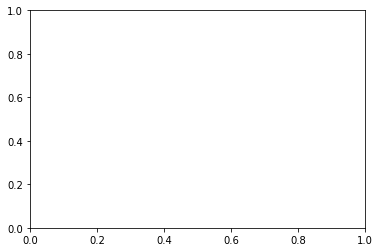

In [87]:
plt.scatter(dados_af_aus, dados_af_nao_aus) #pib x espc vida bloco
#pib x espc vida nao bloco
#PARA UM DETERMINADO ANO

## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados

> A ser respondida de acordo com a progressão do projeto!